# FHN equations

$$
\begin{align}
\partial_t u &= D_u \Delta u + [u(1-u)(u-a) -v  ]/\epsilon\\
\partial_t v &= D_v \Delta v + \epsilon (u - \gamma v)
\end{align}
$$

$$
(a, \epsilon, \gamma, D_u, D_v) 
= (0.25, 0.05, 3.0, 4.0 \times 10^{-5}, 1.0\times 10^{-7})
$$

## Importing modules 

In [1]:
%matplotlib nbagg

In [2]:
import numpy as np
import equations as eq
from scipy.fftpack import rfft, irfft

import h5py
import time

import matplotlib.pyplot as plt
import matplotlib.animation as animation

## Setting Parameters 

In [3]:
NW = 100
fhn01 = eq.FHN(NW)
args = fhn01.getParamDefault()

N2 = fhn01.N2
J = fhn01.J
x = fhn01.get_x()

trange = np.linspace(0.0, 100.0, 5001)

## Setting initial data 

In [4]:
uv0 = np.zeros(2*N2)
u0,v0 = uv0.reshape((2,N2))
U0 = np.zeros(J) + 0.4*np.exp(-800.0*(x-0.4)**2)
V0 = np.zeros(J) + 5.0e-2*np.exp(-800.0*(x-0.35)**2)

u0[:] = rfft(U0)[:N2]
v0[:] = rfft(V0)[:N2]

## Computation 

In [5]:
max_step = 1.0e-2
stime = time.time()
with h5py.File('fhn.hdf5', 'w') as fh:
    fhn01.mkInitDataSet(uv0, fh)    
    fhn01.evolve(fh,trange,args, max_step=max_step, method='BDF')
etime = time.time()
print(int(etime - stime))

19


## Visualization 

In [6]:
with h5py.File('fhn.hdf5', 'r') as fh:
    data = fh['u'][()]

up = fhn01.mkPhysData(
        fhn01.reshapeTS(data))

<IPython.core.display.Javascript object>


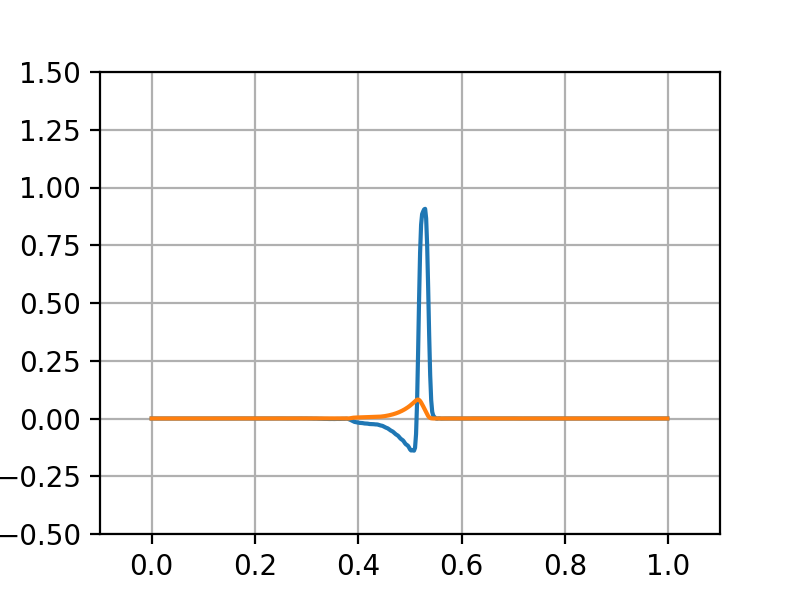

In [7]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)

ax.set_ylim((-0.5, 1.5))
ax.set_xlim((-0.1, 1.1))
ax.grid(True)
lines = plt.plot(x, [np.nan]*len(x), x, [np.nan]*len(x));

def init():
    for l in lines:
        l.set_ydata([np.nan] * len(x))
    return lines

def animate(i):
    for j, l in enumerate(lines):
        l.set_ydata(up[i,j,:])
    return lines

ani = animation.FuncAnimation(
    fig, animate, frames=len(trange),
    init_func=init, interval=1, blit=True,
    repeat=True)